In [47]:
%run initial_data_cleaning.ipynb

In [21]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [77]:
rs = np.random.RandomState(0)
corr = data.corr().drop(['id', 'host_total_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'], axis =1).drop(['price'], axis = 0)
h = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
h

,price
id,0.063
host_total_listings_count,0.37
latitude,-0.047
longitude,-0.06
accommodates,0.33
bathrooms,0.23
bedrooms,0.29
beds,0.24
guests_included,0.26
minimum_nights,-0.024


In [113]:
test = data[['price', 'neighbourhood']]
test = test.dropna()
test['neighbourhood'] = pd.Categorical(test.neighbourhood)

In [111]:
m = smf.ols(formula = 'price ~ neighbourhood', data = test).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     19.62
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          8.21e-244
Time:                        16:22:27   Log-Likelihood:                -49746.
No. Observations:                7540   AIC:                         9.965e+04
Df Residuals:                    7460   BIC:                         1.002e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    167.8675     19.582      8.573      0.000     129.482     206.253
neighbourhood[T.Arbor Heights]               -68.9727     45.371     -1.520      0.129    -157.912      19.966
neighbourhood[T.Atlantic]                    -39.2749     26.041     -1.508      0.132     -90.322      11.773
neighbourhood[T.Ballard]                     -15.8182     21.585     -0.733      0.464     -58.130      26.494
neighbourhood[T.Belltown]                     54.2881     21.555      2.519      0.012      12.034      96.543
neighbourhood[T.Bitter Lake]                 -67.1778     38.482     -1.746      0.081    -142.614       8.258
neighbourhood[T.Brighton]                    -60.8175     34.338     -1.771      0.077    -128.129       6.495
neighbourhood[T.Broadview]                   -62.6616     36.325     -1.725      0.085    -133.869       8.546
neighbourhood[T.Bryant]                      -46.7934     31.190     -1.500      0.134    -107.935      14.348
neighbourhood[T.Capitol Hill]                -18.5319     20.876     -0.888      0.375     -59.454      22.390
neighbourhood[T.Cedar Park]                  -35.9415     39.524     -0.909      0.363    -113.421      41.538
neighbourhood[T.Central Business District]   163.0377     22.817      7.145      0.000     118.310     207.766
neighbourhood[T.Columbia City]               -34.4514     24.434     -1.410      0.159     -82.350      13.447
neighbourhood[T.Crown Hill]                  -56.9965     37.551     -1.518      0.129    -130.607      16.614
neighbourhood[T.Dunlap]                      -75.8987     37.121     -2.045      0.041    -148.667      -3.130
neighbourhood[T.Eastlake]                    -27.5412     26.804     -1.028      0.304     -80.085      25.002
neighbourhood[T.Fauntleroy]                    4.3468     38.988      0.111      0.911     -72.081      80.775
neighbourhood[T.First Hill]                    8.0985     22.174      0.365      0.715     -35.369      51.566
neighbourhood[T.Fremont]                     -34.4880     22.566     -1.528      0.126     -78.724       9.748
neighbourhood[T.Gatewood]                    -48.6925     34.338     -1.418      0.156    -116.004      18.620
neighbourhood[T.Genesee]                     -33.7425     32.349     -1.043      0.297     -97.156      29.672
neighbourhood[T.Georgetown]                   29.5673     42.038      0.703      0.482     -52.839     111.973
neighbourhood[T.Green Lake]                  -27.9023     25.694     -1.086      0.278     -78.270      22.466
neighbourhood[T.Greenwood]                   -58.7755     23.798     -2.470      0.014    -105.427     -12.124
neighbourhood[T.Haller Lake]                  40.3240     32.567      1.238      0.216

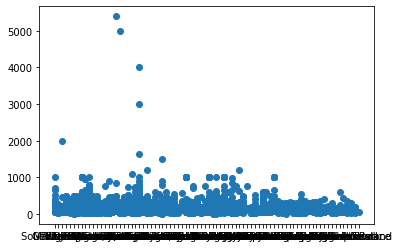

In [120]:
plt.scatter(test.neighbourhood, test.price)

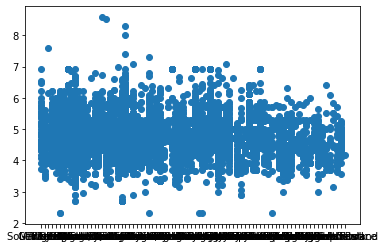

In [150]:
plt.scatter(test.neighbourhood, np.log(test.price))

In [144]:
m = smf.ols(formula = 'price ~ host_is_superhost', data = test).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     95.59
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.92e-22
Time:                        16:42:34   Log-Likelihood:                -50410.
No. Observations:                7540   AIC:                         1.008e+05
Df Residuals:                    7538   BIC:                         1.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.5566      2.929     64.372      0.000     182.815     194.299
superhost    -44.2243      4.523     -9.777      0.000     -53.091     -35.357
==============================================================================
Omnibus:                    10875.441   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7620957.073
Skew:                           8.328   Prob(JB):                         0.00
Kurtosis:                     157.856   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
test = data[['price', 'host_is_superhost', 'neighbourhood']]
test.dropna()
test['host_is_superhost'] = (test.host_is_superhost == 't').astype('int')

D:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
m = smf.ols(formula = 'price ~ host_is_superhost + neighbourhood', data = test).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     19.84
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          1.32e-249
Time:                        16:46:23   Log-Likelihood:                -49730.
No. Observations:                7540   AIC:                         9.962e+04
Df Residuals:                    7459   BIC:                         1.002e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    181.1790     19.686      9.203      0.000     142.588     219.770
neighbourhood[T.Arbor Heights]               -75.9636     45.296     -1.677      0.094    -164.757      12.829
neighbourhood[T.Atlantic]                    -40.3547     25.989     -1.553      0.121     -91.300      10.591
neighbourhood[T.Ballard]                     -17.4316     21.543     -0.809      0.418     -59.662      24.798
neighbourhood[T.Belltown]                     47.9003     21.542      2.224      0.026       5.672      90.129
neighbourhood[T.Bitter Lake]                 -72.2071     38.415     -1.880      0.060    -147.511       3.097
neighbourhood[T.Brighton]                    -66.3229     34.283     -1.935      0.053    -133.526       0.881
neighbourhood[T.Broadview]                   -66.7895     36.259     -1.842      0.066    -137.867       4.288
neighbourhood[T.Bryant]                      -52.5435     31.144     -1.687      0.092    -113.594       8.507
neighbourhood[T.Capitol Hill]                -21.8884     20.842     -1.050      0.294     -62.745      18.968
neighbourhood[T.Cedar Park]                  -38.5781     39.447     -0.978      0.328    -115.906      38.750
neighbourhood[T.Central Business District]   157.2838     22.794      6.900      0.000     112.601     201.967
neighbourhood[T.Columbia City]               -35.3506     24.386     -1.450      0.147     -83.153      12.452
neighbourhood[T.Crown Hill]                  -54.8121     37.477     -1.463      0.144    -128.278      18.654
neighbourhood[T.Dunlap]                      -71.9469     37.053     -1.942      0.052    -144.581       0.688
neighbourhood[T.Eastlake]                    -32.2565     26.763     -1.205      0.228     -84.720      20.207
neighbourhood[T.Fauntleroy]                    4.7602     38.909      0.122      0.903     -71.513      81.034
neighbourhood[T.First Hill]                    1.2410     22.163      0.056      0.955     -42.205      44.687
neighbourhood[T.Fremont]                     -35.2681     22.521     -1.566      0.117     -79.416       8.880
neighbourhood[T.Gatewood]                    -52.9970     34.277     -1.546      0.122    -120.190      14.196
neighbourhood[T.Genesee]                     -37.0462     32.289     -1.147      0.251    -100.342      26.250
neighbourhood[T.Georgetown]                   31.9201     41.955      0.761      0.447     -50.323     114.163
neighbourhood[T.Green Lake]                  -29.7266     25.644     -1.159      0.246     -79.997      20.543
neighbourhood[T.Greenwood]                   -62.5624     23.760     -2.633      0.008    -109.138     -15.987
neighbourhood[T.Haller Lake]                  34.6780     32.516      1.066      0.286

In [152]:
test = data[['price', 'neighbourhood_group_cleansed']]
test.dropna()

m = smf.ols(formula = 'price ~ neighbourhood_group_cleansed', data = test).fit()
m.summary()

KeyError: "['neighbourhood_group_cleansed'] not in index"